# Robot Learning Visualizations

#### Basic Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Change some settings for better aesthetics
mpl.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

# Enable high-definition inline plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # or 'svg' for vector


# Optional: better style
sns.set(style="darkgrid")


#### Load Evaluation Log

In [9]:
#df = pd.read_csv("eval_logs/eval_log.csv")
#df = pd.read_csv("eval_logs/PPO_10deg_rand_force.csv")
#df = pd.read_csv("eval_logs/PPO_10deg_rand_force_4.csv")
#df = pd.read_csv("eval_logs/PPO_10deg_rand_force_4_0force.csv")
df = pd.read_csv("eval_logs/PPO_10deg_rand_force_5.csv")

print("Data loaded:", df.shape)
df.head()


Data loaded: (512, 23)


,step,reward,x,y,z,x_angle,y_angle,z_angle,wheel_speed_l,wheel_speed_r,...,action_1,reward_survive,distance_penalty,y_angle_penalty,z_angle_penalty,wheel_l_penalty,wheel_r_penalty,y_angle_vel_penalty,x_vel_penalty,TimeLimit.truncated
0,0,0.802631,-0.000129,-3.163394e-08,0.627080,0.000016,9.961422,0.000036,0.000000,0.000000,...,-8.357608,1,-0.000097,-0.197271,-6.792568e-07,-0.000000,-0.000000,-0.000000,-0.000000,False
1,1,0.647393,-0.000200,4.972360e-06,0.627225,-0.000415,9.651585,0.001942,3.716250,-3.747165,...,-8.357482,1,-0.000150,-0.196817,-3.640995e-05,-0.063110,-0.063481,-0.003360,-0.025652,False
2,2,0.596986,-0.000307,2.512136e-06,0.627594,-0.000778,9.131435,-0.002840,5.175164,-5.079067,...,-8.559188,1,-0.000230,-0.195882,-5.324806e-05,-0.077592,-0.076816,-0.008461,-0.043980,False
3,3,0.547852,-0.000436,-3.120344e-06,0.628310,-0.001104,8.386661,-0.010361,7.148175,-7.073809,...,-8.491279,1,-0.000327,-0.194051,-1.942667e-04,-0.089159,-0.088850,-0.012550,-0.067016,False
4,4,0.511032,-0.000601,-4.791265e-05,0.629378,0.000727,7.433102,-0.031308,9.356413,-9.281577,...,-8.202869,1,-0.000450,-0.190504,-5.869252e-04,-0.095371,-0.095234,-0.015763,-0.091059,False


#### Reward per Step

Text(0.5, 0, 'Step')

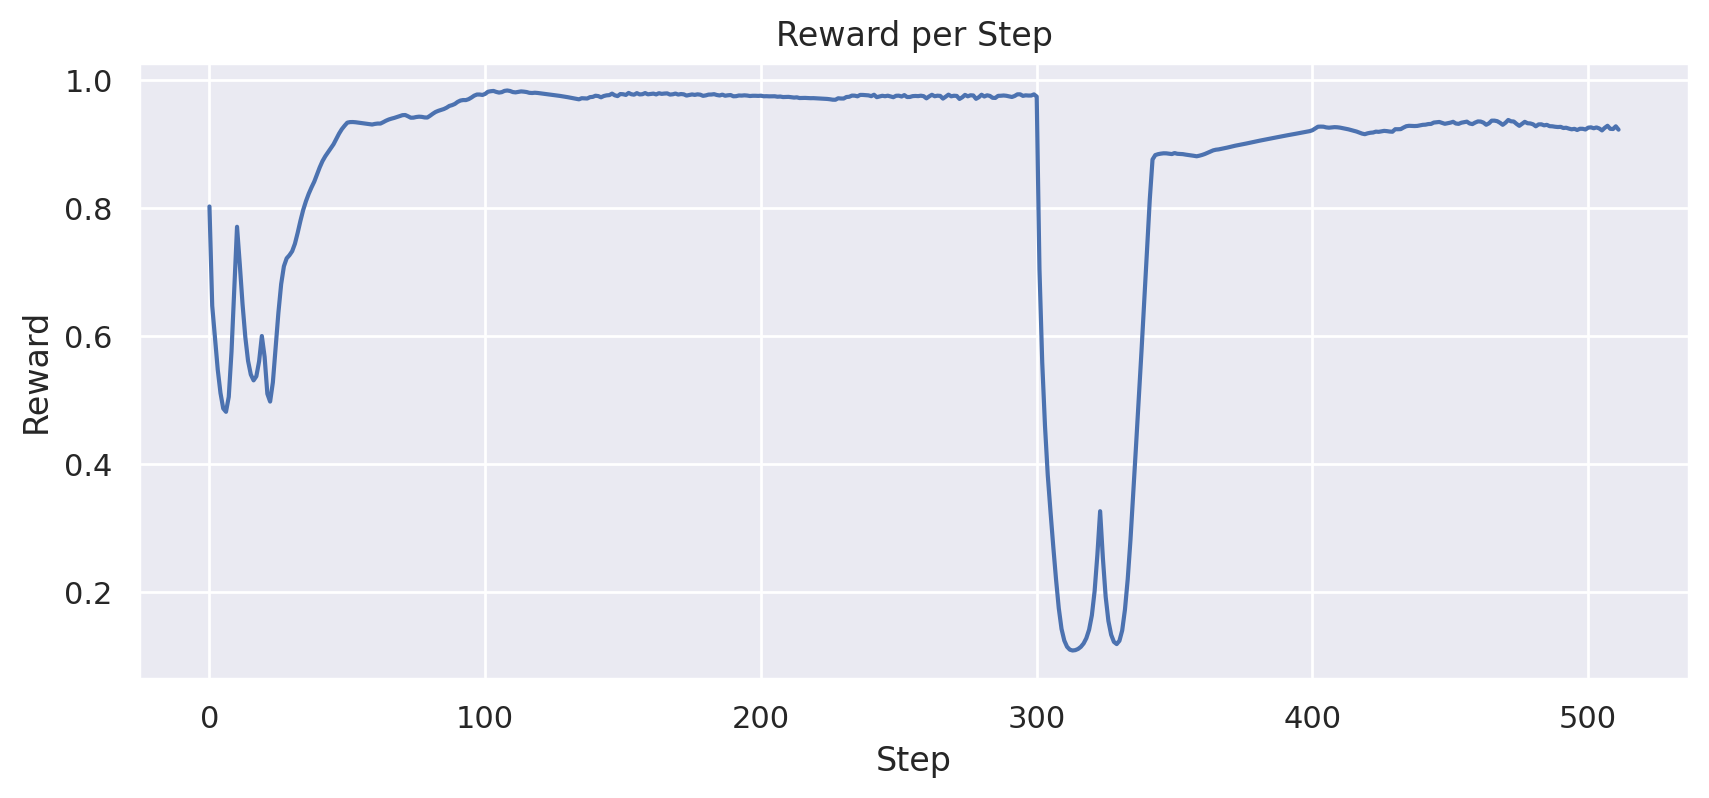

In [10]:
df.groupby("step")["reward"].sum().plot(title="Reward per Step", figsize=(10, 4))
plt.ylabel("Reward")
plt.xlabel("Step")


#### Physical Parameters over Time (in one Plot)

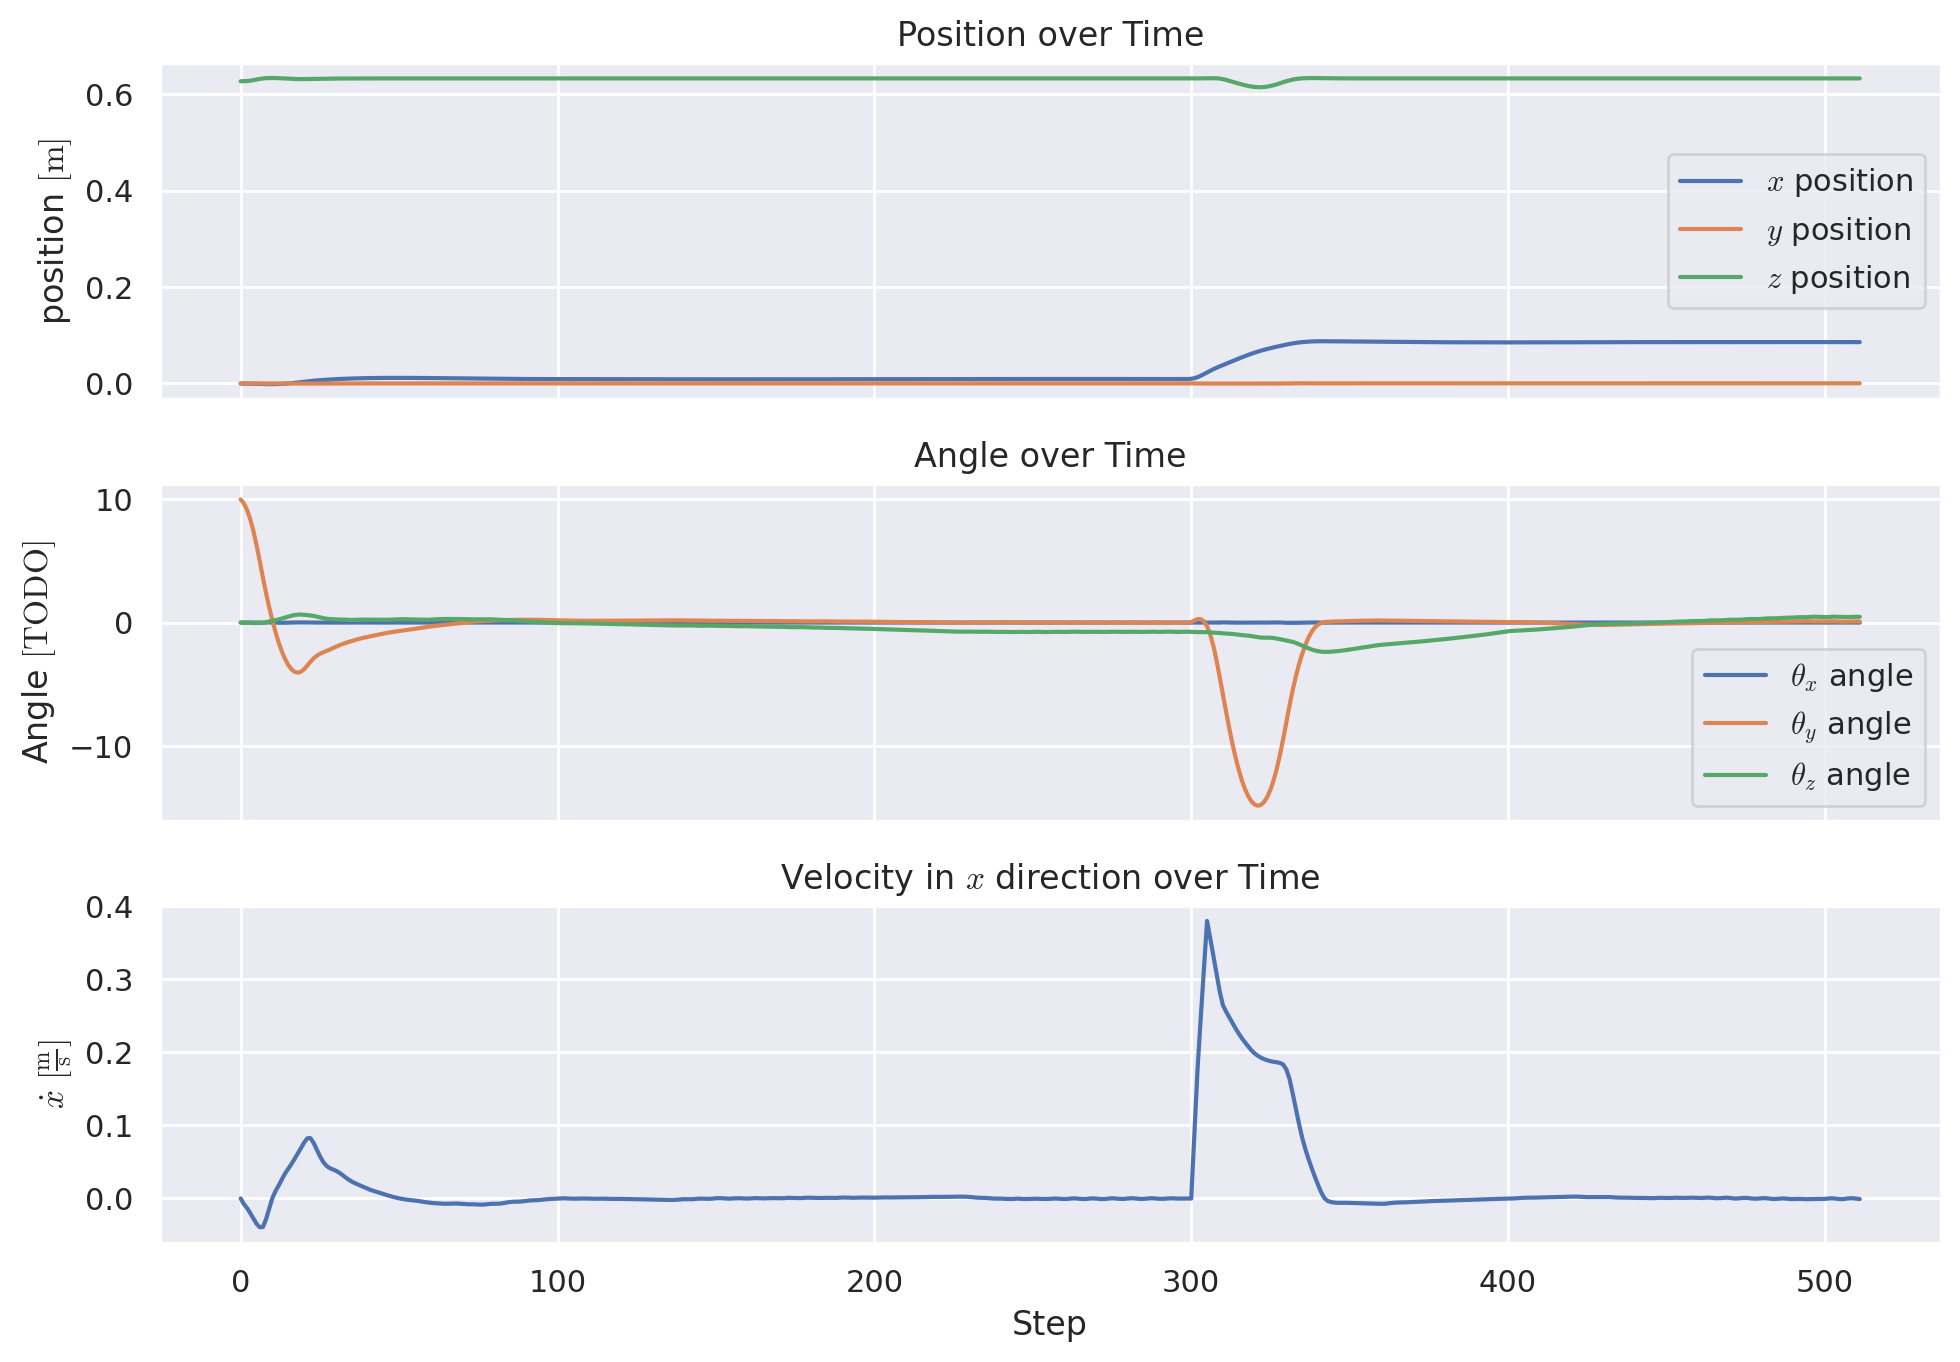

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

# Postitions
df["x"].plot(ax=axes[0], label=r"$x$ position")
axes[0].legend()
df["y"].plot(ax=axes[0], label=r"$y$ position")
axes[0].legend()
df["z"].plot(ax=axes[0], label=r"$z$ position")

axes[0].legend()
axes[0].set_title(r"Position over Time")
axes[0].set_ylabel(r"position $\mathrm{[m]}$")

# Angles
df["x_angle"].plot(ax=axes[1], label=r"$\theta_x$ angle")
axes[1].legend()
df["y_angle"].plot(ax=axes[1], label=r"$\theta_y$ angle")
axes[1].legend()
df["z_angle"].plot(ax=axes[1], label=r"$\theta_z$ angle")
axes[1].legend()

axes[1].set_title(r"Angle over Time")
axes[1].set_ylabel(r"Angle $\mathrm{[TODO]}$")

# Velocities
df["x_vel"].plot(ax=axes[2], label=r"$x$ velocity")
axes[1].legend()
# y_vel isnt extracted and saved yet!
# df["y_vel"].plot(ax=axes[2], label="y velocity")
# axes[1].legend()
# z_vel isnt extracted and saved yet!
# df["z_vel"].plot(ax=axes[2], label="z velocity")
# axes[1].legend()

axes[2].set_title(r"Velocity in $x$ direction over Time")
axes[2].set_ylabel(r"$\dot{x}$ $[\frac{\mathrm{m}}{\mathrm{s}}]$")
axes[2].set_xlabel("Step")


plt.tight_layout()


### Action over Time

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

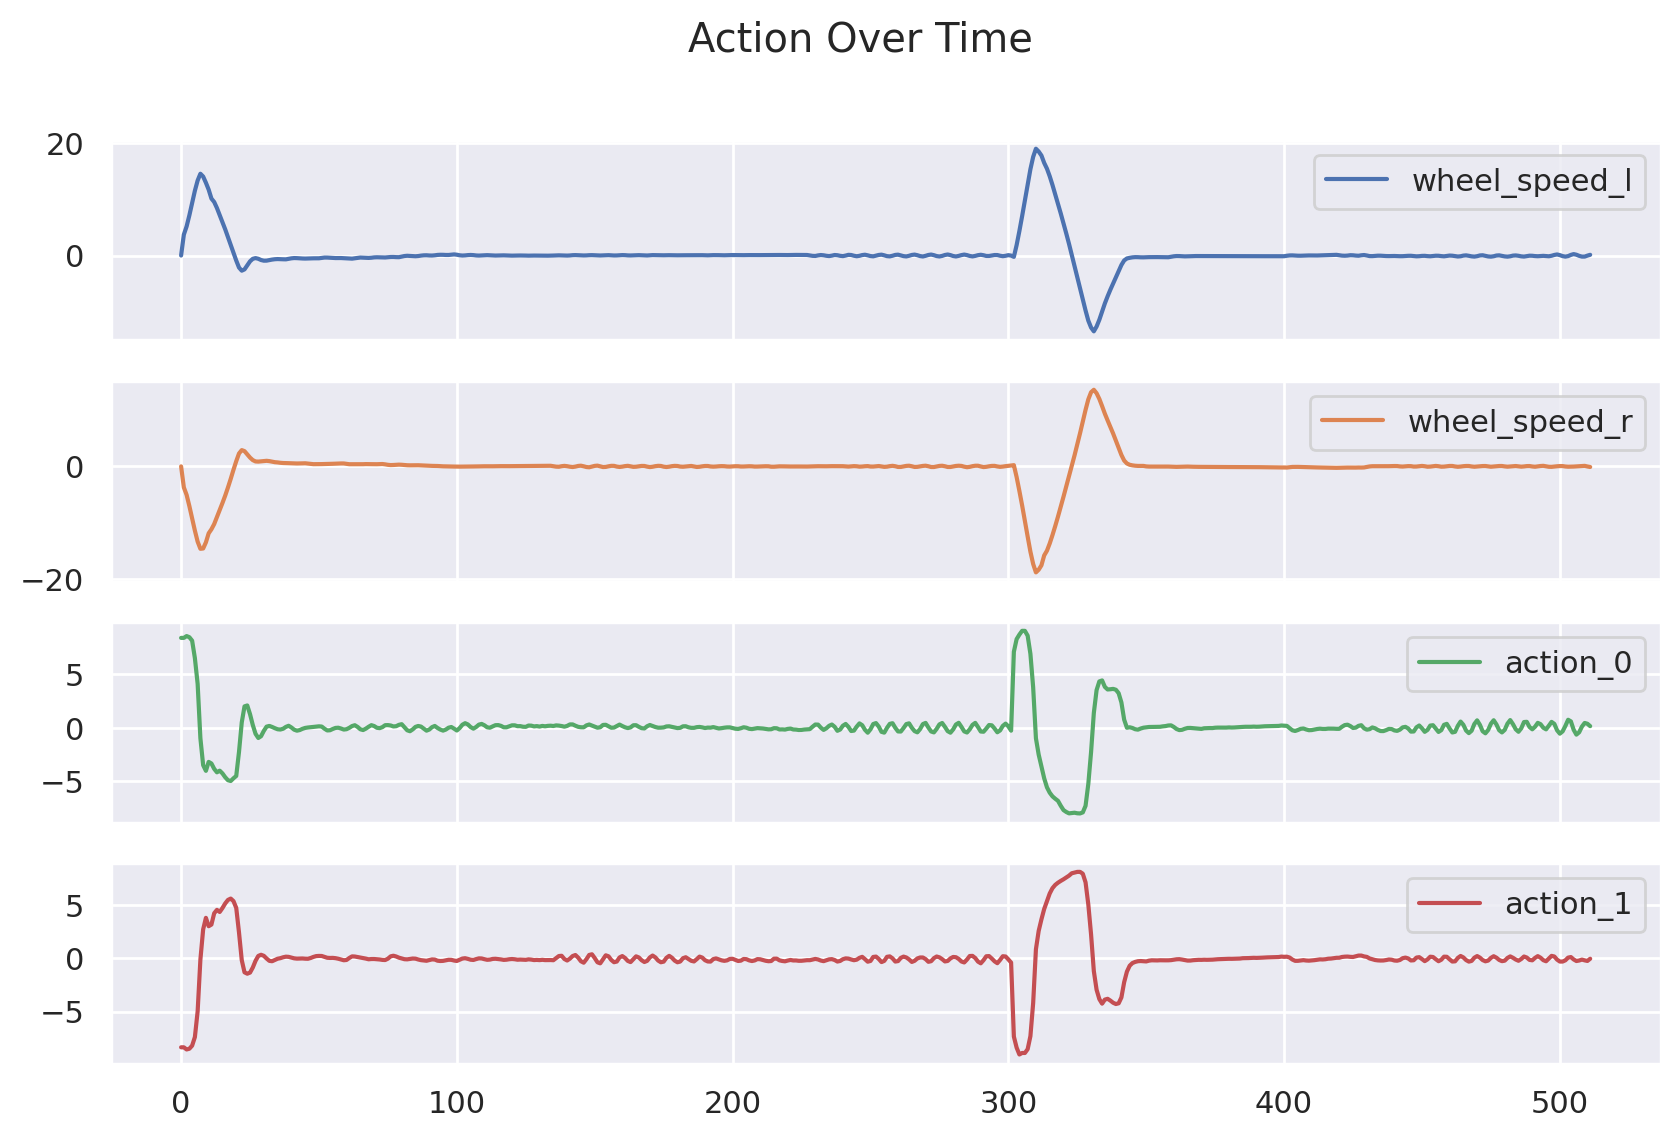

In [12]:
action_cols = [col for col in df.columns if "action" in col or "wheel_speed" in col]
df[action_cols].plot(subplots=True, figsize=(10, 6), title="Action Over Time")


### Individual Penalties over Time

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

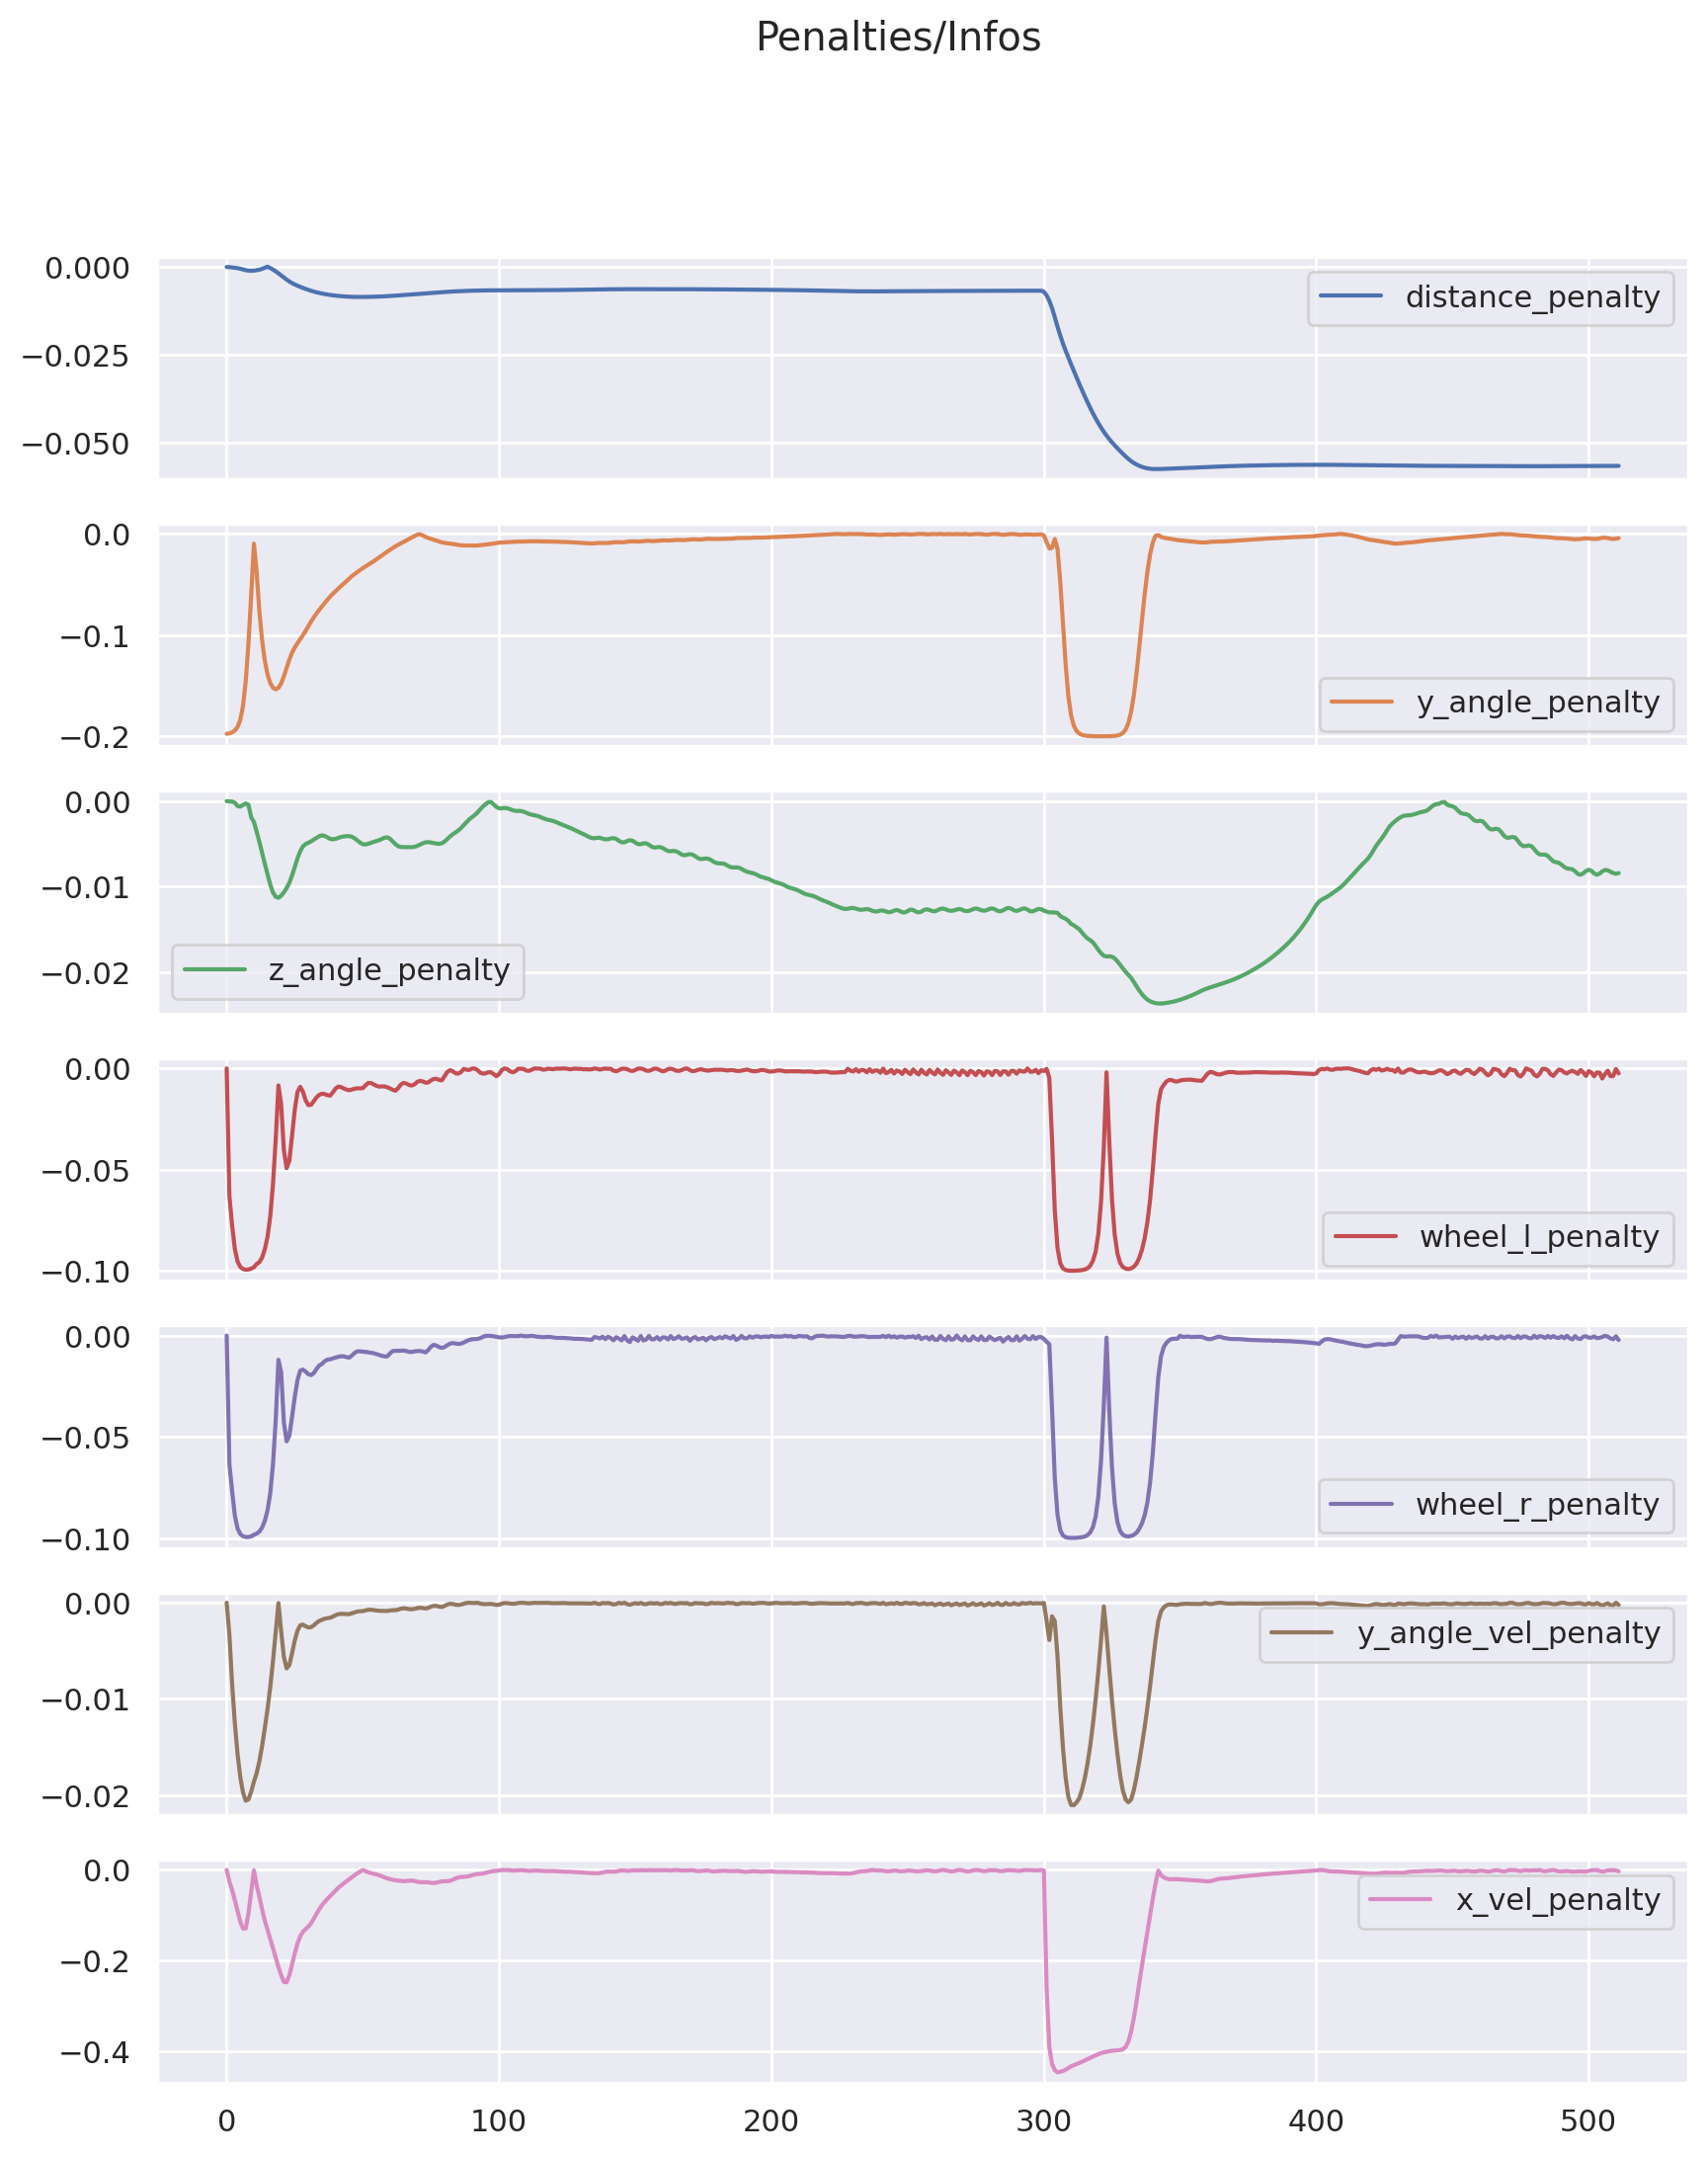

In [13]:
info_cols = [col for col in df.columns if "penalty" in col or "info_" in col]
df[info_cols].plot(subplots=True, figsize=(10, 12), title="Penalties/Infos")